In [4]:
pip install wikipedia

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11706 sha256=f9a524c14ff127d11d29962a0b97a55a2fb25431c4524e776d22f6e592f2ac1a
  Stored in directory: c:\users\agama\appdata\local\pip\cache\wheels\07\93\05\72c05349177dca2e0ba31a33ba4f7907606f7ddef303517c6a
Successfully built wikipedia
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import wikipedia
import networkx as nx
from collections import Counter
import matplotlib.pyplot as plt
import re
from matplotlib.lines import Line2D

In [4]:
def fetch_links_from_content(page_title):
    try:
        # Fetch page content
        page = wikipedia.page(page_title)
        content = page.content.lower()  # Lowercase for case-insensitive matching
        links = page.links  # Get the list of links
        links_lower = [link.lower() for link in links]  # Normalize links to lowercase
        
        # Count occurrences of each link in the content
        link_counts = Counter()
        for link in links_lower:
            count = len(re.findall(rf'\b{re.escape(link)}\b', content))  # Word-boundary search
            if count > 0:
                link_counts[link] += count

        return link_counts
    except wikipedia.exceptions.DisambiguationError as e:
        print(f"Disambiguation error for {page_title}: {e.options}")
        return Counter()
    except wikipedia.exceptions.PageError:
        print(f"Page '{page_title}' does not exist.")
        return Counter()
    except Exception as e:
        print(f"An error occurred: {e}")
        return Counter()

# Build the graph based on content-based counts
def build_graph(topic):
    graph = nx.DiGraph()  # Create a directed graph

    # Fetch links and their occurrence counts from the main page
    print(f"Fetching links and counts for '{topic}'...")
    link_counts = fetch_links_from_content(topic)

    # Add nodes and weighted edges for the main page
    for link, count in link_counts.items():
        graph.add_node(link)  # Add each linked page as a node
        graph.add_edge(topic, link, weight=min(10, count))  # Add a weighted edge for the link

    # Check for interconnections between the linked pages (simple unweighted edges)
    for link in link_counts.keys():
        print(f"Checking connections from '{link}'...")
        sub_links = fetch_links_from_content(link)  # Get links from the linked page
        for sub_link in sub_links.keys():
            if sub_link in link_counts:  # Only add connections within the initial set of links
                sub_link_count = sub_links[sub_link]  # Count occurrences of sub_link in sub_links
                existing_weight = graph[link][sub_link]["weight"] if graph.has_edge(link, sub_link) else 0
                new_weight = existing_weight + sub_link_count
                graph.add_edge(link, sub_link, weight=min(10, new_weight))

    return graph

wiki_graph = build_graph("Fermat's Little Theorem")
print(f"Graph has {wiki_graph.number_of_nodes()} nodes and {wiki_graph.number_of_edges()} edges.")

Fetching links and counts for 'Fermat's Little Theorem'...
Checking connections from 'cambridge university press'...
Checking connections from 'carmichael's theorem'...
Checking connections from 'carmichael function'...
Checking connections from 'carmichael number'...
Checking connections from 'chinese hypothesis'...
Checking connections from 'coprime'...
Checking connections from 'corollary'...


C:\Program Files\Python38\lib\site-packages\wikipedia\wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file C:\Program Files\Python38\lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Disambiguation error for corollary: ['Toyota Corolla', 'petals', 'Corolla (headgear)', 'Corolla (gastropod)', 'Corolla, North Carolina']
Checking connections from 'cut-the-knot'...
Checking connections from 'd. c. heath and company'...
Checking connections from 'elementary number theory'...
Checking connections from 'encyclopedia of mathematics'...
Checking connections from 'euler'...
Checking connections from 'euler's theorem'...
Page 'euler's theorem' does not exist.
Checking connections from 'euler's totient function'...
Checking connections from 'extended euclidean algorithm'...
Checking connections from 'fermat's last theorem'...
Checking connections from 'fermat primality test'...
Checking connections from 'fermat pseudoprime'...
Checking connections from 'finite field'...
Checking connections from 'frénicle de bessy'...
Checking connections from 'integer'...
Page 'integer' does not exist.
Checking connections from 'kurt hensel'...
Checking connections from 'lucas primality test'

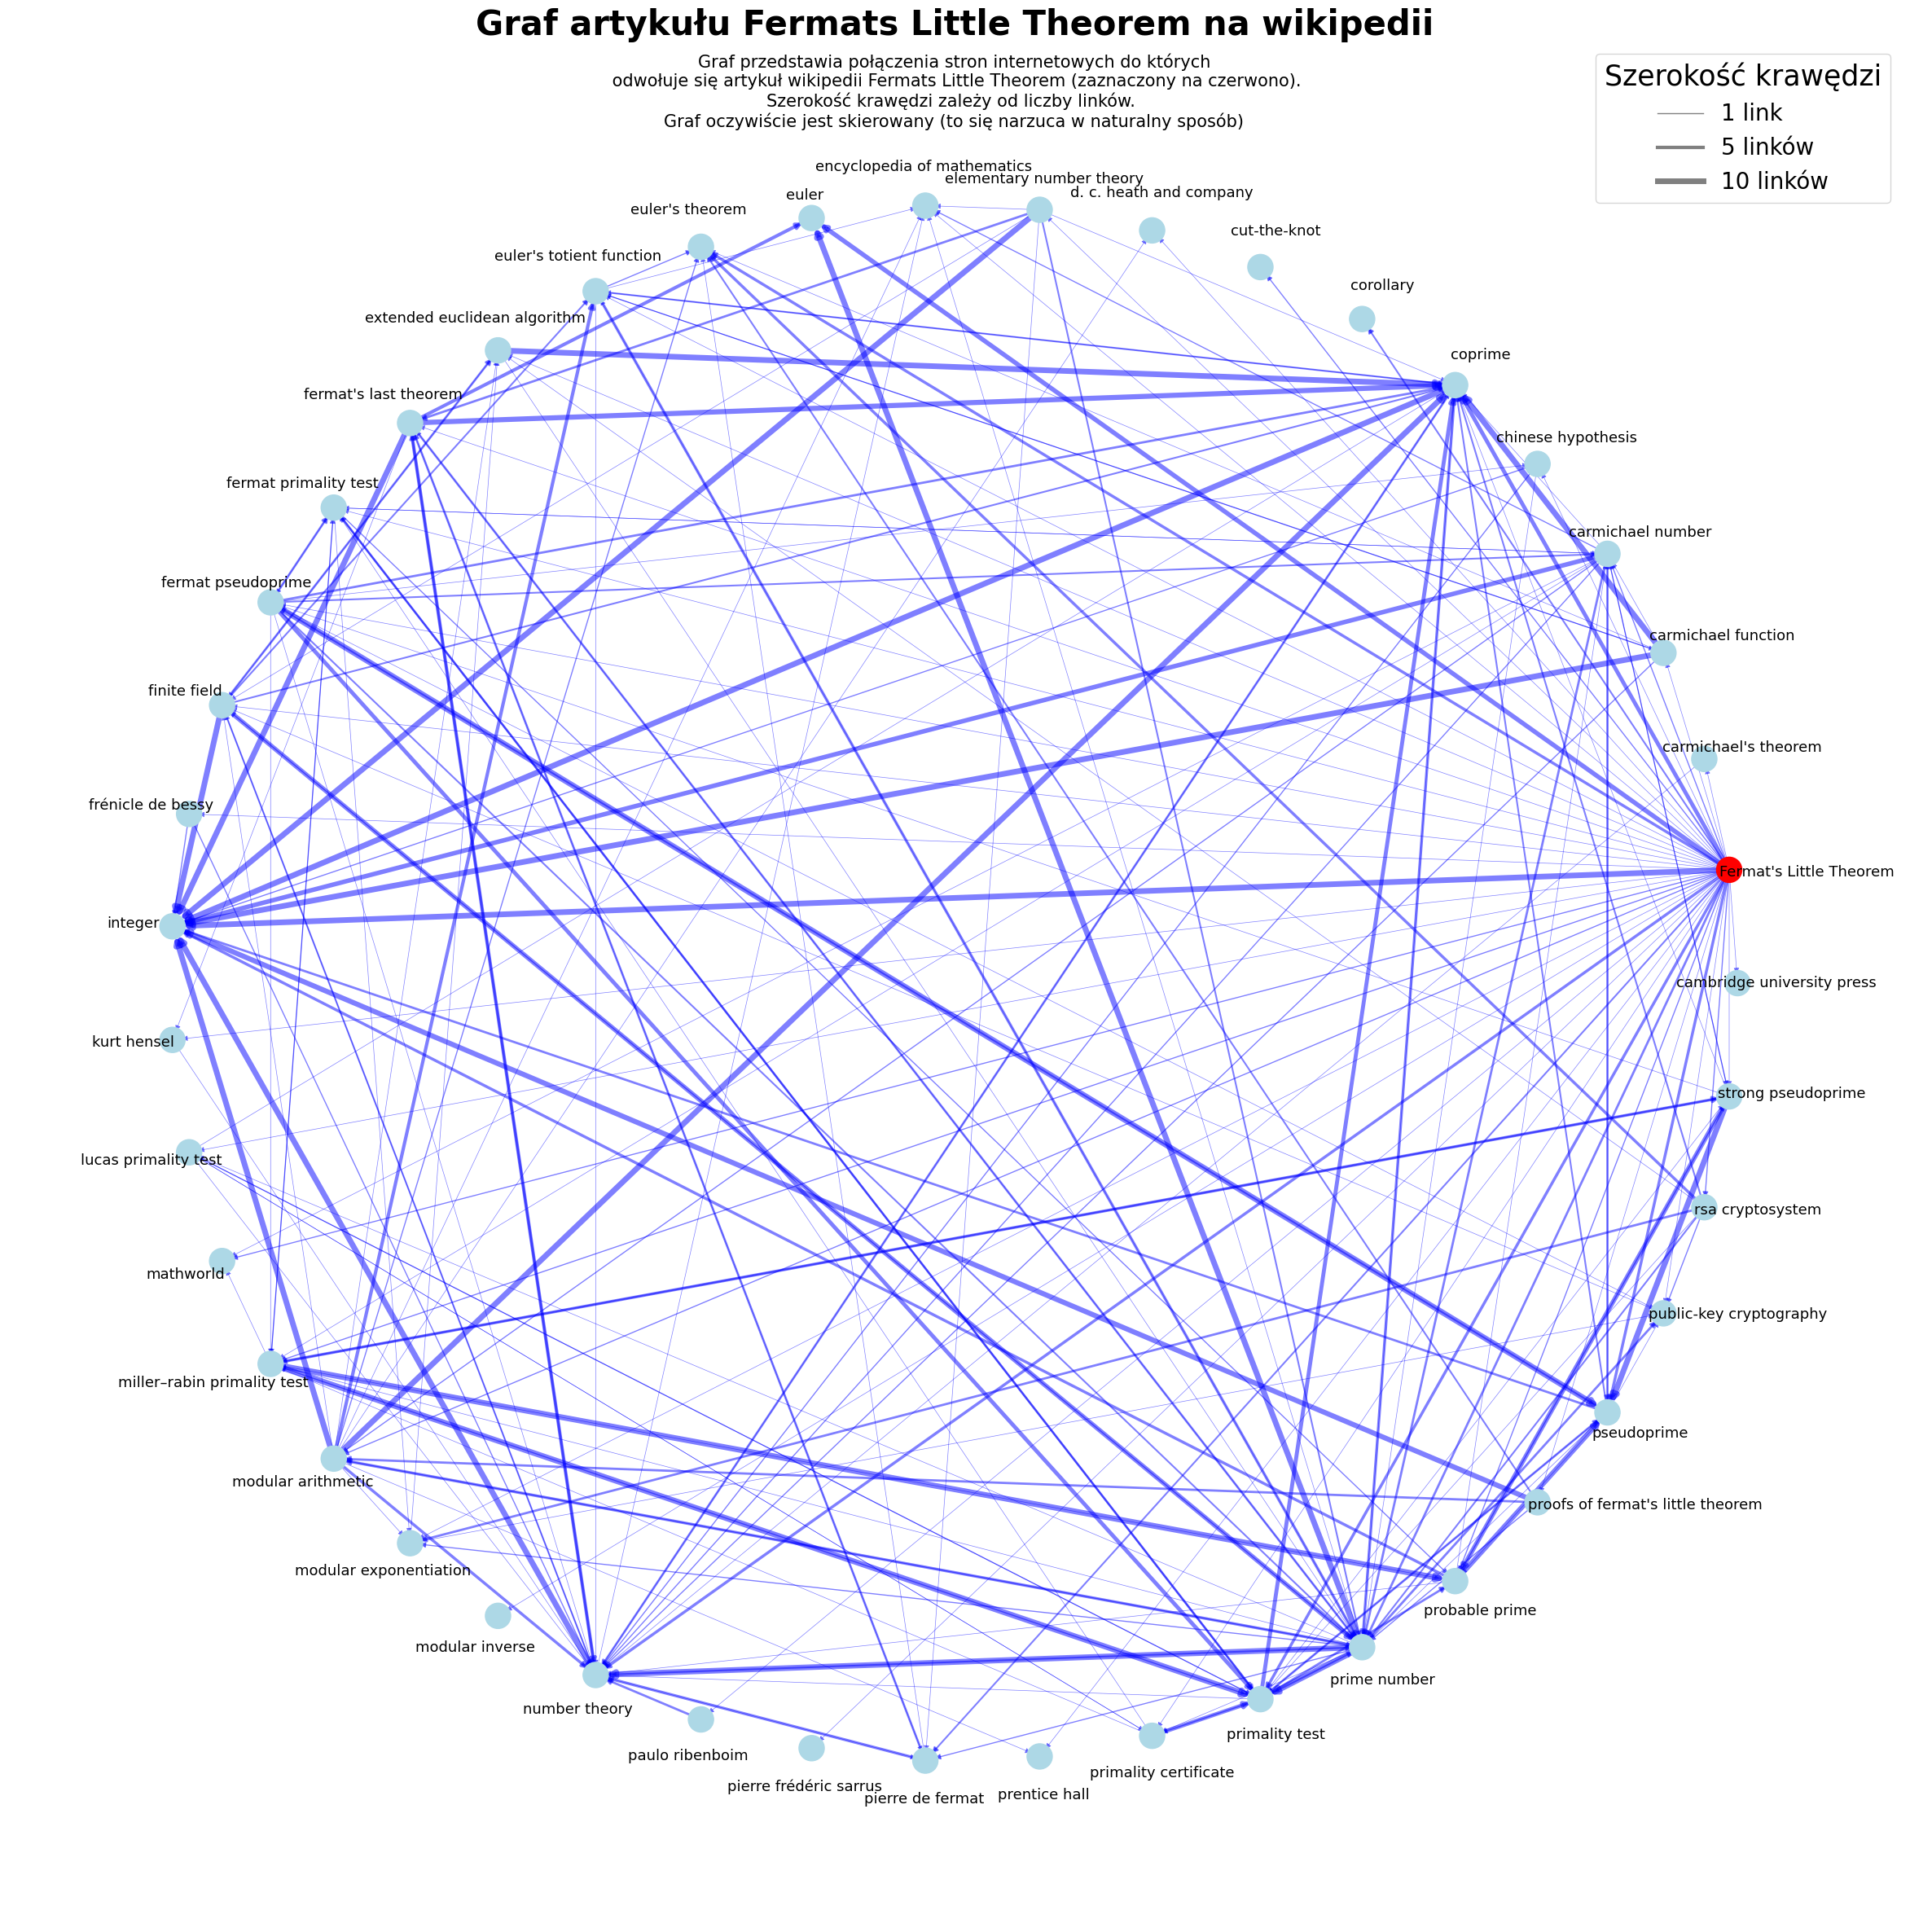

In [21]:
plt.figure(figsize=(30, 30))
pos = nx.circular_layout(wiki_graph) 

node_colors = ["lightblue"] * len(wiki_graph.nodes) 
node_colors[1] = "red" 

nx.draw_networkx_nodes(wiki_graph, pos, node_size=500, node_color=node_colors)
edges = wiki_graph.edges(data=True)
weights = [data["weight"] for _, _, data in edges]
nx.draw_networkx_edges(wiki_graph, pos, edgelist=edges, width=[w / 2 for w in weights], edge_color = "blue", alpha = 0.5)  # Adjust width
    
label_pos = {node: (x * 1.05, y * 1.05) for node, (x, y) in pos.items()}
    
current_x, current_y = label_pos["elementary number theory"]
label_pos["elementary number theory"] = (current_x, current_y - 0.01)
current_x, current_y = label_pos["miller–rabin primality test"]
label_pos["miller–rabin primality test"] = (current_x - 0.03, current_y)
current_x, current_y = label_pos["carmichael function"]
label_pos["carmichael function"] = (current_x + 0.03, current_y)
current_x, current_y = label_pos["strong pseudoprime"]
label_pos["strong pseudoprime"] = (current_x + 0.03, current_y + 0.01)
current_x, current_y = label_pos["rsa cryptosystem"]
label_pos["rsa cryptosystem"] = (current_x + 0.02, current_y + 0.01)
current_x, current_y = label_pos["proofs of fermat's little theorem"]
label_pos["proofs of fermat's little theorem"] = (current_x + 0.1, current_y + 0.03)
current_x, current_y = label_pos["Fermat's Little Theorem"]
label_pos["Fermat's Little Theorem"] = (current_x + 0.05, current_y - 0.01)
current_x, current_y = label_pos["euler"]
label_pos["euler"] = (current_x, current_y - 0.02)
current_x, current_y = label_pos["public-key cryptography"]
label_pos["public-key cryptography"] = (current_x + 0.05, current_y + 0.02)
    
nx.draw_networkx_labels(wiki_graph, label_pos, font_size=13, font_color="black")

legend_elements = [
    Line2D([0], [0], color="gray", lw=1, label="1 link"),
    Line2D([0], [0], color="gray", lw=3, label="5 linków"),
    Line2D([0], [0], color="gray", lw=5, label="10 linków"),
]

plt.legend(handles=legend_elements, loc="upper right", title="Szerokość krawędzi", fontsize = 20, title_fontsize = 25)
plt.axis("off")
plt.title("Graf artykułu Fermats Little Theorem na wikipedii", fontsize=30, fontweight = "bold")
plt.text(0, 1.1, "Graf przedstawia połączenia stron internetowych do których\n odwołuje się artykuł wikipedii Fermats Little Theorem (zaznaczony na czerwono).\nSzerokość krawędzi zależy od liczby linków. \nGraf oczywiście jest skierowany (to się narzuca w naturalny sposób)", fontsize=15, ha='center')
plt.savefig('graph_plot.png', format='png')
plt.show()


In [100]:
print(wiki_graph.nodes)

['cambridge university press', "Fermat's Little Theorem", "carmichael's theorem", 'carmichael function', 'carmichael number', 'chinese hypothesis', 'coprime', 'corollary', 'cut-the-knot', 'd. c. heath and company', 'elementary number theory', 'encyclopedia of mathematics', 'euler', "euler's theorem", "euler's totient function", 'extended euclidean algorithm', "fermat's last theorem", 'fermat primality test', 'fermat pseudoprime', 'finite field', 'frénicle de bessy', 'integer', 'kurt hensel', 'lucas primality test', 'mathworld', 'miller–rabin primality test', 'modular arithmetic', 'modular exponentiation', 'modular inverse', 'number theory', 'paulo ribenboim', 'pierre frédéric sarrus', 'pierre de fermat', 'prentice hall', 'primality certificate', 'primality test', 'prime number', 'probable prime', "proofs of fermat's little theorem", 'pseudoprime', 'public-key cryptography', 'rsa cryptosystem', 'strong pseudoprime']
